任务：
使用线性回归 和决策树回归预测学生期末成绩，并比较模型性能。数据集采用UCI机器学习库中的"学生表现数据集"。  数据文件：student-mat.csv

实现步骤：
1. 将数据加载到Pandas DataFrame
2. 分离特征(X)和目标变量(y)
3. 按80-20划分训练测试集(random_state=42)
4. 使用StandardScaler标准化特征
5. 训练以下模型：
   - 线性回归
   - 决策树回归
6. 计算各模型的MSE分数
7. 输出评估指标


In [3]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

In [13]:
path = r'E:\kecheng\github_mine\ml_work\datas\student-mat.csv'
datas = pd.read_csv( path ,delimiter=';' , )
datas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
datas.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
datas.drop(["G1","G2"] , axis = "columns", inplace = True)
datas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [16]:
datas.loc[:,'schoolsup':'romantic'] = datas.loc[:,'schoolsup':'romantic'].map(lambda X: 1 if X=='yes' else 0 ,)
datas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,4,3,2,1,2,5,4,10


In [17]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [18]:
datas['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

In [19]:
datas['Pstatus'].value_counts()

Pstatus
T    354
A     41
Name: count, dtype: int64

In [20]:
datas["Mjob"].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

In [21]:
datas["reason"].value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

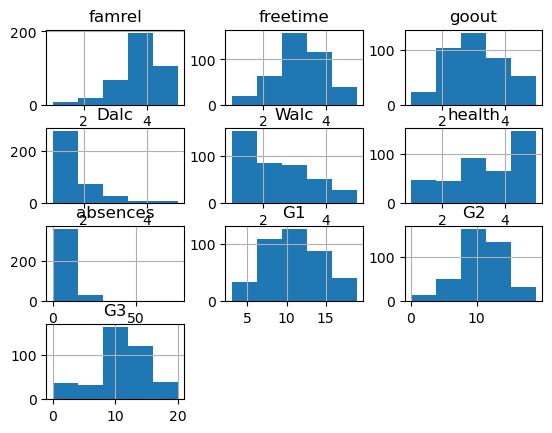

In [7]:
from matplotlib import pyplot as plt
datas.loc[:,"famrel":'G3'].hist(bins=5)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

In [24]:
trainset, testset = train_test_split(datas, test_size=0.2, random_state=42)
X_train = trainset.iloc[:,:-1]
y_train = trainset.iloc[:,-1]
X_test = testset.iloc[:,:-1]
y_test = testset.iloc[:,-1]

In [54]:
def log_(X):
    X +=1
    return np.log(X)
log_pipeline = make_pipeline(SimpleImputer(strategy='mean'),FunctionTransformer(log_ , ),StandardScaler())
str_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent') , OneHotEncoder(handle_unknown='ignore'))
# str_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent') , OrdinalEncoder(handle_unknown='error'))
default_number_pipeline = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())


In [55]:
pra_pipeline = ColumnTransformer([
    # ("log", log_pipeline, ["famrel",'Dalc' ,"Walc","health",'absences']),
    ("log", log_pipeline, ['absences']),
    ("str",str_pipeline , make_column_selector(dtype_include=object)),
], remainder=default_number_pipeline)
from sklearn.ensemble import RandomForestRegressor
full_pipeline1 = Pipeline([('processing',pra_pipeline),('sel_fea' , SelectFromModel(estimator= RandomForestRegressor(n_estimators=100 , random_state=42),threshold='median')) ,("reg" ,LinearRegression())])
full_pipeline2 = Pipeline([('processing',pra_pipeline ),('sel_fea' , SelectFromModel(estimator= RandomForestRegressor(n_estimators=100 , random_state=42),threshold='median')),("reg" ,DecisionTreeRegressor(random_state=42))])
# ,('sel_fea' , SelectFromModel(estimator= RandomForestRegressor(n_estimators=100 , random_state=42),threshold='median'))

In [56]:
full_pipeline1.fit(X_train,y_train)
full_pipeline2.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_ at 0x0000027681153400>)),
                                                                  ('standardscaler',
                                                                   StandardScale...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000276FF531810>)])),
                ('sel_fea',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                 threshold='median')),
                ('reg', DecisionTreeRegressor(random_state=42))])

In [57]:
y_pred1 = full_pipeline1.predict(X_test)
from sklearn.metrics import mean_squared_error                              # onehotencoder 在线性回归模型上表现得比 ordinalencoder 好
mean_squared_error(y_test,full_pipeline1.predict(X_test),)

16.796444918927403

In [58]:
y_pred2 = full_pipeline2.predict(X_test)                            # onehotencoder 在决策树回归模型上表现得比 ordinalencoder 差
mean_squared_error(y_test,y_pred2,)


25.632911392405063

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1) ,  r2_score(y_test,y_pred2)

(0.18086290173611486, -0.2500781420935829)

In [60]:
# 以上是没有使用过多项式回归的
# 接下来就是多项式回归
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2 , include_bias = False)
poly_pipeline = make_pipeline(SimpleImputer(strategy='median') , polynomial , StandardScaler())

pra_pipeline = ColumnTransformer([
    ("poly", poly_pipeline, ["famrel",'Dalc' ,"Walc","health",'absences']),         # 选择这几列进行多项式回归
    ("str",str_pipeline , make_column_selector(dtype_include=object)),
], remainder=default_number_pipeline)
from sklearn.ensemble import RandomForestRegressor
full_pipeline3 = Pipeline([('processing',pra_pipeline) ,("reg" ,LinearRegression())])
full_pipeline4 = Pipeline([('processing',pra_pipeline ),("reg" ,DecisionTreeRegressor(random_state=42))])
# ,('sel_fea' , SelectFromModel(estimator= RandomForestRegressor(n_estimators=100 , random_state=42),threshold='median'))

In [61]:
full_pipeline3.fit(X_train,y_train)
full_pipeline4.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('poly',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['famrel', 'Dalc', 'Walc',
                                                   'health', 'absences']),
                                                 ('str',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000276811BF760>)])),
                ('reg', DecisionTreeRegressor(random_state=42))])

In [62]:

y_pred3 = full_pipeline3.predict(X_test)
y_pred4 = full_pipeline4.predict(X_test)

In [63]:
mean_squared_error(y_test,y_pred3) , mean_squared_error(y_test,y_pred4)

(19.94800386549551, 29.10126582278481)

In [64]:
r2_score(y_test,y_pred3) , r2_score(y_test,y_pred4)

(0.02716616037447661, -0.4192245178632825)

In [65]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
full_pipeline5 = Pipeline([('processing',pra_pipeline) ,("L2" ,Ridge(random_state=42))])
full_pipeline6 = Pipeline([('processing',pra_pipeline ),("L2" ,Lasso(random_state=42))])

In [66]:
full_pipeline5.fit(X_train,y_train)
full_pipeline6.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('poly',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['famrel', 'Dalc', 'Walc',
                                                   'health', 'absences']),
                                                 ('str',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000276811BF760>)])),
                ('L2', Lasso(random_state=42))])

In [67]:
y_pred5 = full_pipeline5.predict(X_test)
y_pred6 = full_pipeline6.predict(X_test)
mean_squared_error(y_test,y_pred5) , mean_squared_error(y_test,y_pred6)


(19.51428307955235, 19.14913481181242)

In [68]:
r2_score(y_test,y_pred5) , r2_score(y_test,y_pred6)

(0.04831806411178863, 0.06612579032506105)

In [62]:
###################################################################      泰坦尼克 ###############################################################################

In [248]:
from pathlib import Path
import pandas as pd
import tarfile
def get_data():
    path = r".\datas\titanic.tgz"
    path = Path(path)
    with tarfile.open(path) as tar:
        tar.extractall(r".\datas")
    path1 = Path(r".\datas\titanic\train.csv")
    path2 = Path("./datas/titanic/test_augmented.csv")
    return pd.read_csv(path1,index_col= 0  ), pd.read_csv(path2, index_col= 0 )

trainset, testset = get_data()



In [274]:
trainset["Name"].str.split().str.get(2) if trainset["Name"].str.split().str.get(1).str.contains("Mr","Miss") else trainset["Name"].str.split().str.get(1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [251]:
trainset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
testset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [72]:
trainset.info() # Age,Cabin,Embarked 有缺失值

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [73]:
trainset["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [74]:
trainset[trainset["Survived"]==1]["Sex"].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [75]:
(trainset[trainset["Survived"]==1]["Age"] <= 35).sum()

207

In [77]:
trainset["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [78]:
trainset["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [79]:
# name列对于分类无影响删除，Cabin列缺失值太多，而且列内的唯一值也很多，删除，Ticket列列内的唯一值很多，删除
# todo:from trainset and testset drop columnsindex = Name , Cabin ,Ticket
trainset.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)
testset.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)

In [80]:
trainset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [81]:
trainset_labels = trainset["Survived"]
trainset.drop(["Survived"], axis=1, inplace=True)   # 删除标签

In [90]:
testset_labels = testset["Survived"]
testset.drop(["Survived"], axis=1, inplace=True)

In [82]:
trainset.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [224]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.svm import SVC
from sklearn.compose import make_column_selector,make_column_transformer,ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
trainset_num = make_column_transformer((SimpleImputer(strategy='median'),make_column_selector(dtype_include=np.number))).fit_transform(trainset)

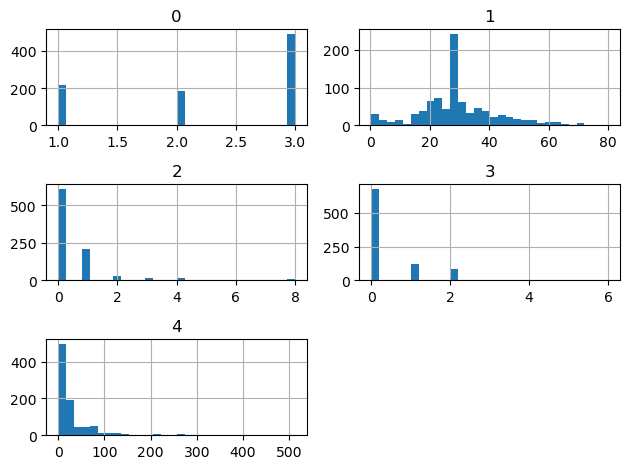

In [208]:
trainset_num = pd.DataFrame(trainset_num)
trainset_num.hist(bins = 30,)            # .iloc[:,[-1]]
plt.tight_layout()
plt.show()

In [209]:
# testset没有标签，无法验证训练模型的数据，将trainset分化，一部分训练一部分看结果
X_train_ttn , X_test_ttn , y_train_ttn , y_test_ttn = trainset , testset , trainset_labels , testset_labels

In [210]:
def log_(X):
    return np.log(X+1)
log_pipeline =  Pipeline([('impute',SimpleImputer(strategy = 'median')),('log',FunctionTransformer(log_)),('scaler',StandardScaler())])


default_number_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),StandardScaler())
onehot_pipeline = Pipeline([('impute',SimpleImputer(strategy = 'most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
ordinal_pipeline = Pipeline([('impute',SimpleImputer(strategy = 'most_frequent')),('ordinal',OrdinalEncoder())])
preprocessing = ColumnTransformer([
    ('log' , log_pipeline ,["Fare"]),
    ('num' , SimpleImputer(strategy='most_frequent') , ["Pclass",'SibSp','Parch']),
    # ('str_col' , onehot_pipeline,make_column_selector(dtype_include=object)),
    ('str_col' , ordinal_pipeline,make_column_selector(dtype_include=object)),
    ('num_def', default_number_pipeline,['Age',])
],)

In [225]:
final_pipeline1 = Pipeline([
    ('preprocessing' , preprocessing),
    ('classfy' , SGDClassifier(random_state=42))
])

final_pipeline2 =Pipeline([
    ('preprocessing' , preprocessing),
    ('classfy' , KNeighborsClassifier(n_neighbors=3)),
])

final_pipeline3 = Pipeline([
    ('preprocessing' , preprocessing),
    ('classfy' , RandomForestClassifier(random_state=42))
])

final_pipeline4 = Pipeline([
    ('preprocessing' , preprocessing),
    ('classfy' , DecisionTreeClassifier(random_state=42))
])
final_pipeline5 = Pipeline([
    ('preprocessing' , preprocessing),
    ('classfy' , SVC(random_state=42))
])

In [226]:
final_pipeline1.fit(X_train_ttn,y_train_ttn)
final_pipeline2.fit(X_train_ttn,y_train_ttn)
final_pipeline3.fit(X_train_ttn,y_train_ttn)
final_pipeline4.fit(X_train_ttn,y_train_ttn)
final_pipeline5.fit(X_train_ttn,y_train_ttn)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<function log_ at 0x0000027684A01900>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('num',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('str_col',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027684A84250>),
                                                 ('num_def',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('classfy', SVC(random_state=42))])

In [213]:

# cross_val_score(trainset,trainset_labels,scoring='accuracy',cv=3)

In [214]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve



In [215]:
f1_score(y_test_ttn,final_pipeline1.predict(X_test_ttn)),accuracy_score(y_test_ttn,final_pipeline1.predict(X_test_ttn)) , roc_auc_score(y_test_ttn,final_pipeline1.predict(X_test_ttn))


(0.6796116504854369, 0.7631578947368421, 0.7438169425511197)

In [216]:
f1_score(y_test_ttn,final_pipeline2.predict(X_test_ttn)),accuracy_score(y_test_ttn,final_pipeline2.predict(X_test_ttn)), roc_auc_score(y_test_ttn,final_pipeline2.predict(X_test_ttn))


(0.6476190476190476, 0.7344497607655502, 0.7170155793573514)

In [217]:
f1_score(y_test_ttn,final_pipeline3.predict(X_test_ttn)),accuracy_score(y_test_ttn,final_pipeline3.predict(X_test_ttn)), roc_auc_score(y_test_ttn,final_pipeline3.predict(X_test_ttn))



(0.6580645161290323, 0.7464114832535885, 0.7266309639727361)

In [218]:
f1_score(y_test_ttn,final_pipeline4.predict(X_test_ttn)),accuracy_score(y_test_ttn,final_pipeline4.predict(X_test_ttn)), roc_auc_score(y_test_ttn,final_pipeline4.predict(X_test_ttn))



(0.6646153846153846, 0.7392344497607656, 0.7283106134371957)

In [227]:
f1_score(y_test_ttn,final_pipeline5.predict(X_test_ttn)),accuracy_score(y_test_ttn,final_pipeline5.predict(X_test_ttn)), roc_auc_score(y_test_ttn,final_pipeline5.predict(X_test_ttn))

(0.707395498392283, 0.7822966507177034, 0.7654089581304772)

In [219]:
from sklearn.model_selection import cross_val_score
cross_val_score(final_pipeline1,trainset,trainset_labels,scoring='accuracy',cv=3)

array([0.71380471, 0.75084175, 0.77441077])

In [220]:
cross_val_score(final_pipeline2,trainset,trainset_labels,scoring='accuracy',cv=3)

array([0.77104377, 0.7979798 , 0.7979798 ])

In [221]:
cross_val_score(final_pipeline3,trainset,trainset_labels,scoring='accuracy',cv=3)

array([0.76094276, 0.81818182, 0.7979798 ])

In [222]:
cross_val_score(final_pipeline4,trainset,trainset_labels,scoring='accuracy',cv=3)

array([0.72727273, 0.79461279, 0.76094276])

In [228]:
cross_val_score(final_pipeline5,trainset,trainset_labels,scoring='accuracy',cv=3)

array([0.81481481, 0.84175084, 0.81481481])

In [242]:
grid_canshu = [
    {
        "preprocessing__log__impute__strategy": ["median","mean"],
        "classfy__kernel":["rbf","poly"],
        "classfy__degree":[2,3,5],
        "classfy__C":[0.5,1,3,5],
    }
]
# SVC()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(final_pipeline5,param_grid=grid_canshu,cv = 3,scoring='accuracy')

In [243]:
grid_search.fit(X_train_ttn,y_train_ttn)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<function log_ at 0x0000027684A01900>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Fare']),
                                                                        ('num',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['Pclass',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('str_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000027684A84250>),
                                                                        ('num_def',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age'])])),
                                       ('classfy', SVC(random_state=42))]),
             param_grid=[{'classfy__C': [0.5, 1, 3, 5],
                          'classfy__degree': [2, 3, 5],
                          'classfy__kernel': ['rbf', 'poly'],
                          'preprocessing__log__impute__strategy': ['median',
                                                                   'mean']}],
             scoring='accuracy')

In [244]:
grid_search.best_params_

{'classfy__C': 1,
 'classfy__degree': 2,
 'classfy__kernel': 'rbf',
 'preprocessing__log__impute__strategy': 'median'}

In [245]:
grid_search.best_score_

0.8237934904601572

In [246]:
pred = grid_search.best_estimator_.predict(X_test_ttn)

In [247]:
accuracy_score(y_test_ttn,pred)

0.7822966507177034